In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Deep computer vision

Loading dataset

In [2]:
# URL fetch failure on https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1129)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
train_images.shape

(50000, 32, 32, 3)

Let's look at an image

In [5]:
train_images[0].shape

(32, 32, 3)

In [6]:
train_labels[0]

array([6], dtype=uint8)

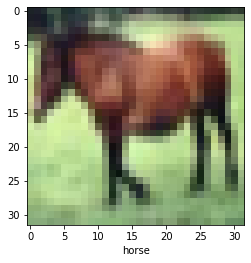

In [7]:
IMG_INDEX = 7
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

Making the CNN model

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Lets look at the sumary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

Adding dense layers

In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Training the model

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5277 - accuracy: 0.4426 - val_loss: 1.3090 - val_accuracy: 0.5270
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1742 - accuracy: 0.5837 - val_loss: 1.1044 - val_accuracy: 0.6120
Epoch 3/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0225 - accuracy: 0.6416 - val_loss: 1.0456 - val_accuracy: 0.6338
Epoch 4/10
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9212 - accuracy: 0.6763 - val_loss: 0.9631 - val_accuracy: 0.6660
Epoch 5/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8435 - accuracy: 0.7038 - val_loss: 0.9029 - val_accuracy: 0.6887
Epoch 6/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7853 - accuracy: 0.7253 - val_loss: 0.8888 - val_accuracy: 0.6926
Epoch 7/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7346 - accuracy: 0.7403 - val_loss: 0.8686 -

Evaluating the model

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 2s - loss: 0.8843 - accuracy: 0.7066 - 2s/epoch - 5ms/step
0.70660001039505


Making predictions

In [14]:
predictions = model.predict(test_images)

[-0.58940804  4.3237157  -2.3706312  -2.6111145  -6.370068   -5.3694367
 -1.3772957  -4.380904    1.8168567   8.007182  ]
9
Guess: truck


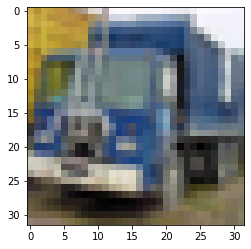

Expected: truck


In [15]:
i = 14
print(predictions[i])
print(np.argmax(predictions[i]))
print('Guess:', class_names[np.argmax(predictions[i])])
plt.figure()
plt.imshow(test_images[i],  cmap=plt.cm.binary)
plt.show()
print('Expected:', class_names[test_labels[i][0]])

## Data augmentation

In [16]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

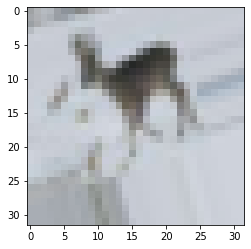

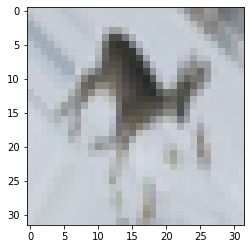

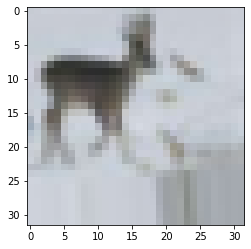

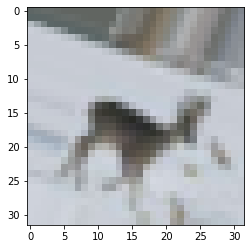

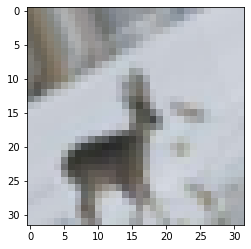

In [17]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_img = train_images[20]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:
        break

plt.show()

## Pretrained models

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

cats_vs_dogs dataset

In [19]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='D:/datasets/tensorflow'
)

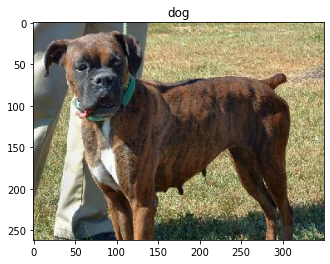

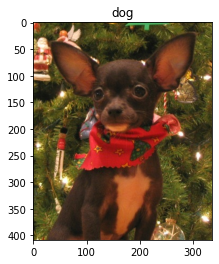

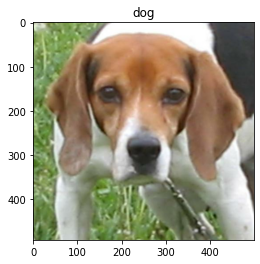

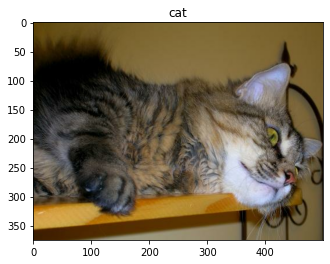

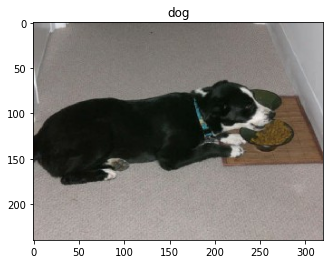

In [20]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(5):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))

Preprocessing

In [21]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) -1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

Apply function to all images

In [22]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Let's have a look at the images

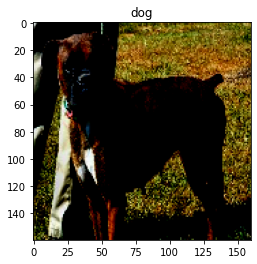

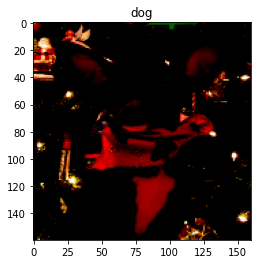

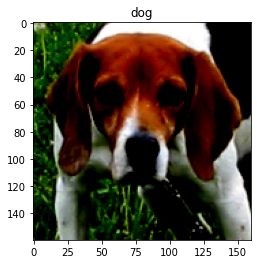

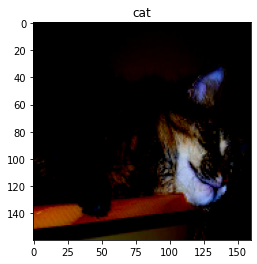

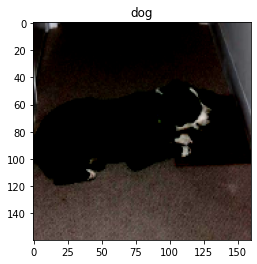

In [23]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

Shuffle and batches

In [24]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

Let's look at how the images have changed

In [25]:
for img, label in raw_train.take(2):
  print("Original shape:", img.shape)

for img, label in train.take(2):
  print("New shape:", img.shape)

Original shape: (262, 350, 3)
Original shape: (409, 336, 3)
New shape: (160, 160, 3)
New shape: (160, 160, 3)


Picking a pretrained model

In [26]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

In [27]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [28]:
for image, _ in train_batches.take(1):
   pass

feature_batch = base_model(image)
print(feature_batch.shape)

(32, 5, 5, 1280)


freeze the base

In [29]:
base_model.trainable = False

In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

Adding our classifier

In [31]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

In [32]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


Train the model

In [34]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Evaluate the model

In [35]:
initial_epochs = 3
validation_steps=20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 6s 249ms/step - loss: 0.8189 - accuracy: 0.4953


In [36]:
history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 168s 285ms/step - loss: 0.2353 - accuracy: 0.8867 - val_loss: 0.0991 - val_accuracy: 0.9609
Epoch 2/3
582/582 [==============================] - 167s 286ms/step - loss: 0.0787 - accuracy: 0.9716 - val_loss: 0.0692 - val_accuracy: 0.9738
Epoch 3/3
582/582 [==============================] - 181s 311ms/step - loss: 0.0612 - accuracy: 0.9781 - val_loss: 0.0586 - val_accuracy: 0.9781
[0.8866738080978394, 0.9715744256973267, 0.9780762791633606]


Saving and loading

In [37]:
model.save('D:/models/tensorflow/dogs_vs_cats.h5')

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Making predictions

In [38]:
new_model = tf.keras.models.load_model('D:/models/tensorflow/dogs_vs_cats.h5')

In [39]:
loss0,accuracy0 = model.evaluate(test_batches)
loss0,accuracy0 = new_model.evaluate(test_batches)

73/73 [==============================] - 21s 277ms/step - loss: 0.0561 - accuracy: 0.9789


In [40]:
predictions = new_model.predict(test_batches)

In [41]:
def get_label(n):
    cat_dis = abs(n)
    dog_dis = abs(n - 1)
    if cat_dis < dog_dis:
        return 'cat'
    return 'dog'

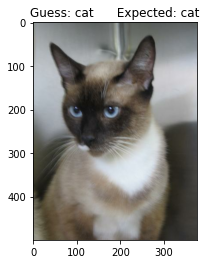

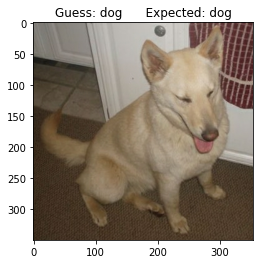

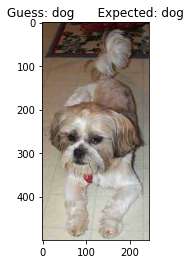

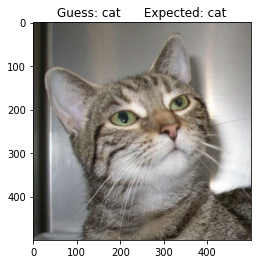

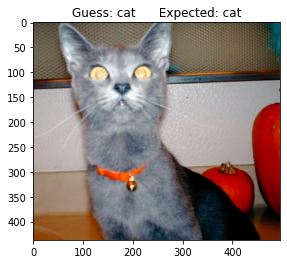

In [42]:
i = 0
for img, lab in raw_test.take(5):
    plt.figure()
    plt.imshow(img)
    plt.title('Guess: ' + get_label(predictions[i][0]) + '      Expected: ' + get_label_name(lab))
    i += 1

Let's look at where it fails

C:\Users\User\AppData\Local\Temp/ipykernel_3348/3356842661.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


0.9789337919174549


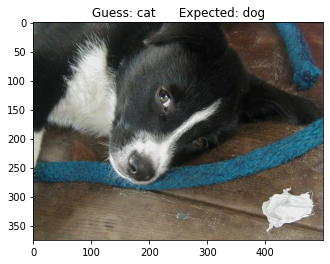

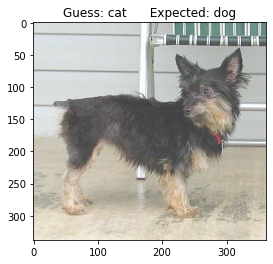

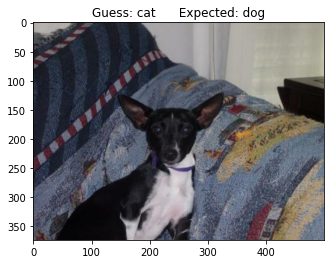

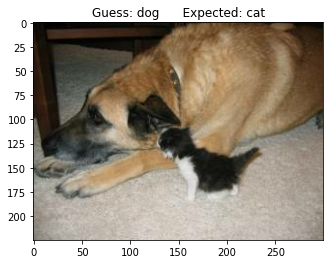

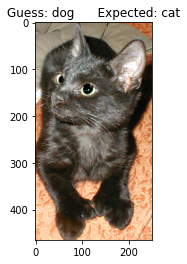

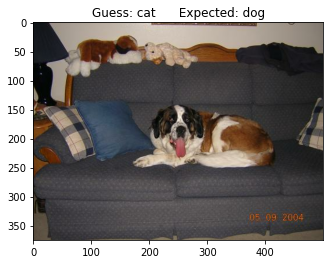

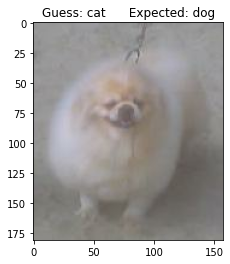

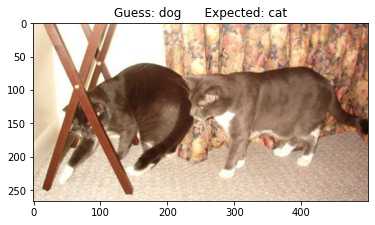

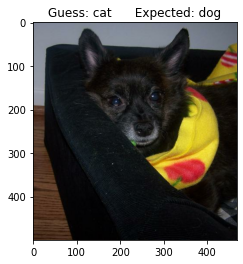

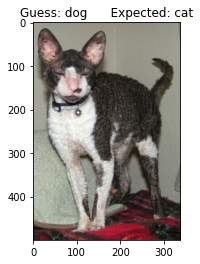

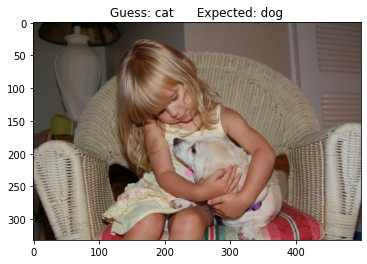

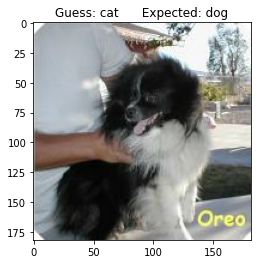

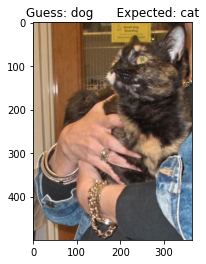

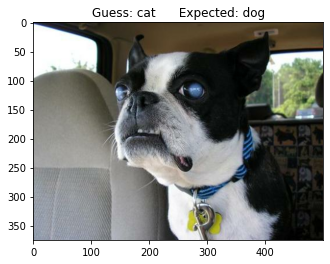

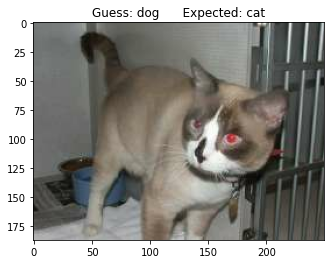

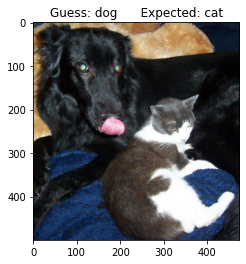

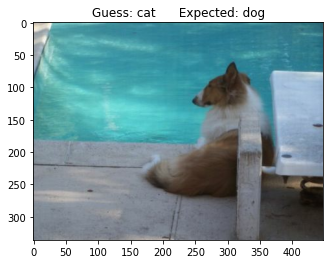

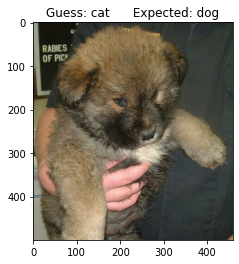

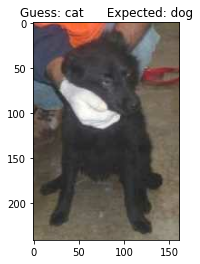

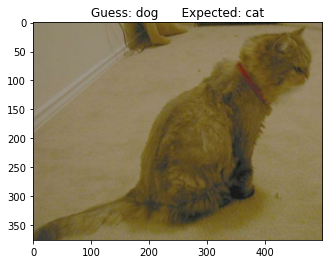

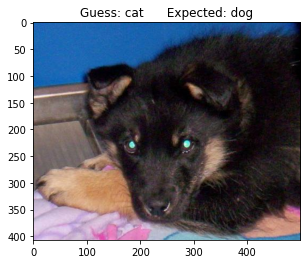

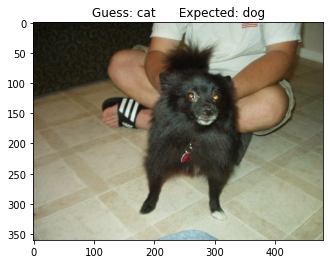

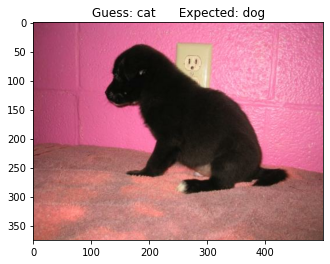

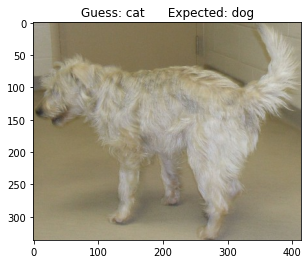

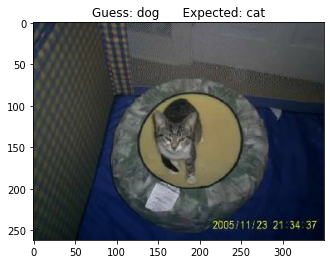

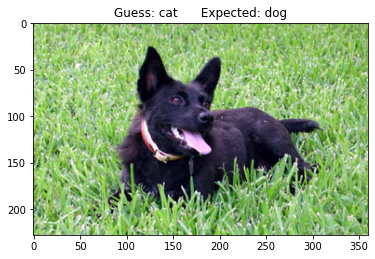

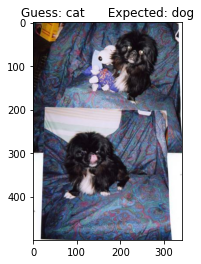

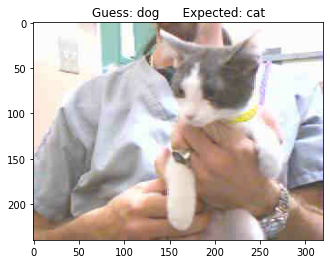

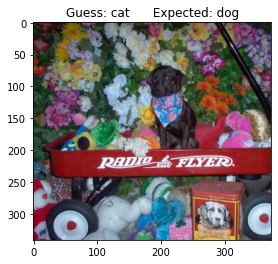

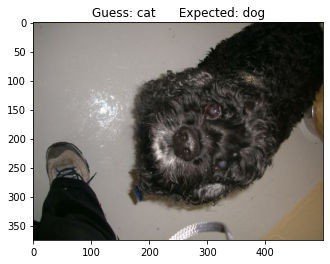

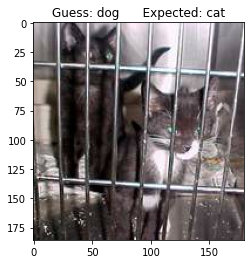

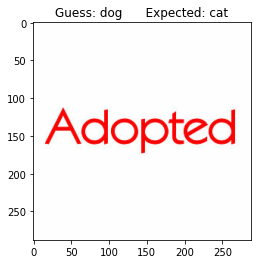

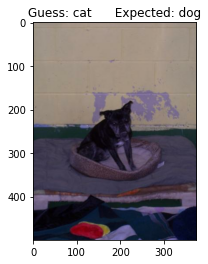

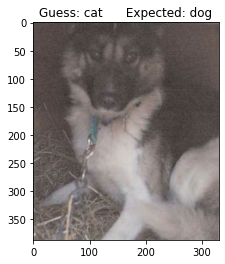

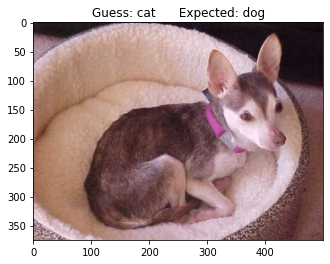

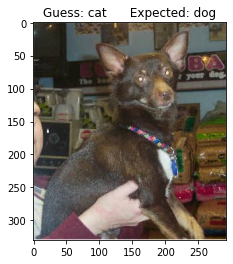

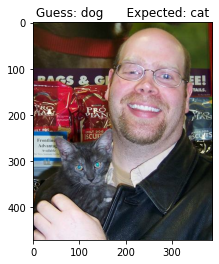

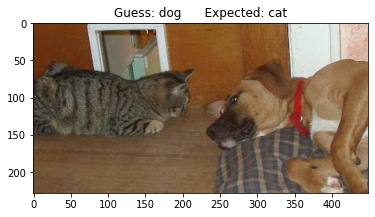

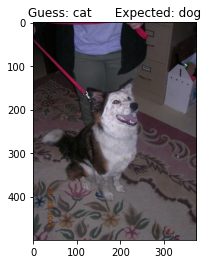

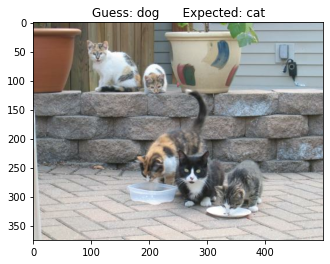

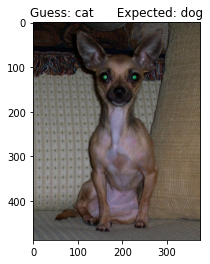

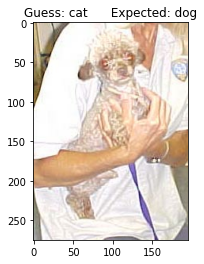

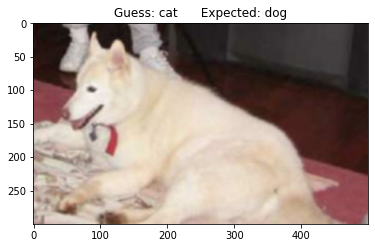

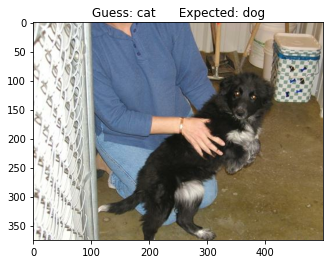

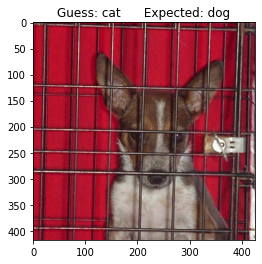

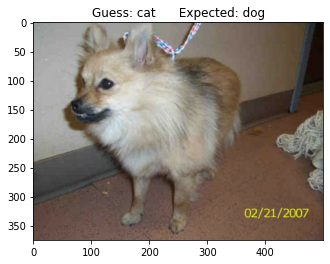

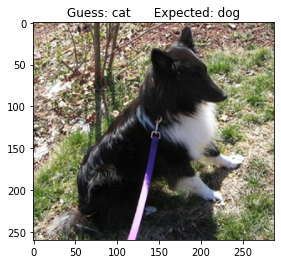

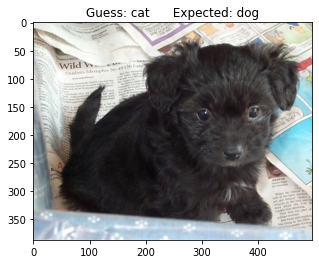

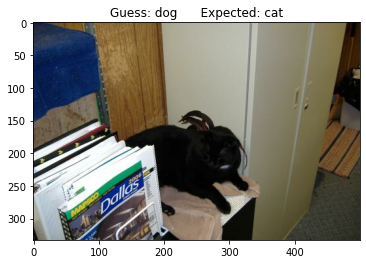

In [43]:
i, c = 0, 0
for img, lab in raw_test:
    guess = get_label(predictions[i][0])
    expected = get_label_name(lab)
    if guess == expected:
        c += 1
    else: # elif predictions[i][0] < 1 and predictions[i][0] > 0:
        plt.figure()
        plt.imshow(img)
        plt.title('Guess: ' + guess + '      Expected: ' + expected)
    i += 1
print(c/i)